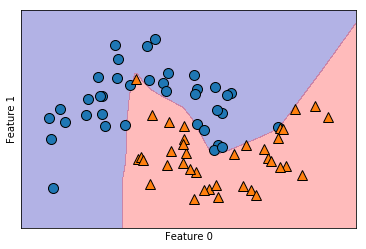

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import mglearn
from matplotlib import pyplot as plt

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 隠れ層に100ユニットを持つNNによる、決定境界
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

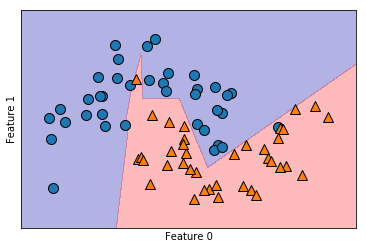

In [5]:
# 隠れ層に10ユニットを持つNN
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

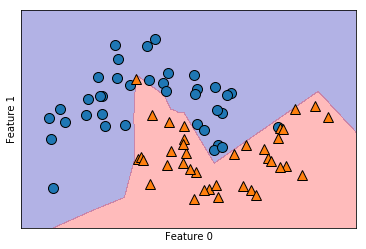

In [7]:
# 10ユニットの隠れ層を２つ使う
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


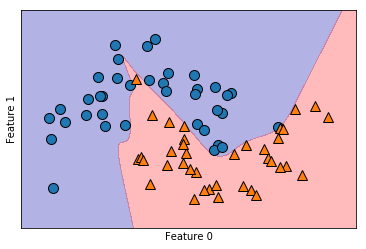

In [8]:
# 10ユニットの隠れ層を２つ使い、活性化関数にtanhを使う
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

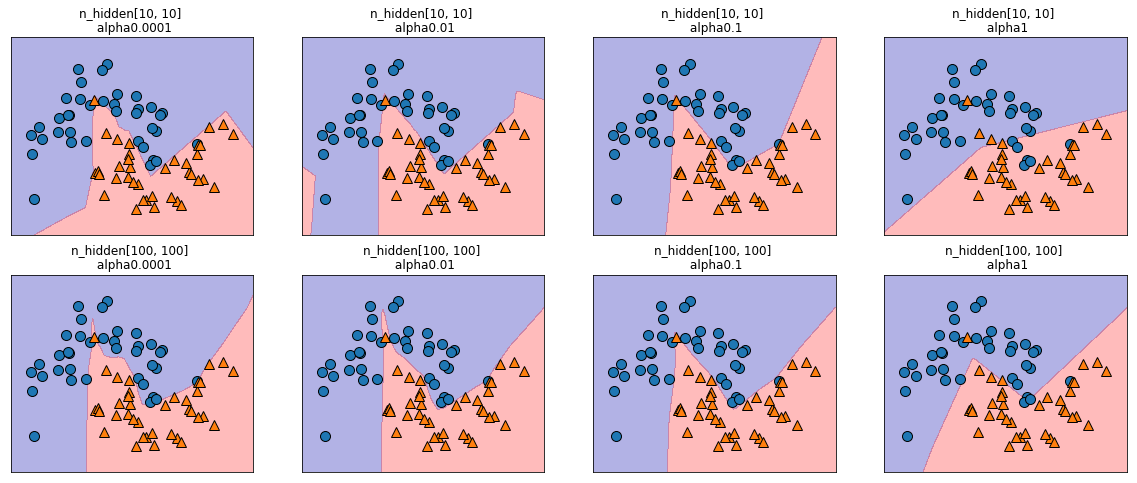

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx , n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title(f"n_hidden[{n_hidden_nodes}, {n_hidden_nodes}] \n alpha{alpha}")

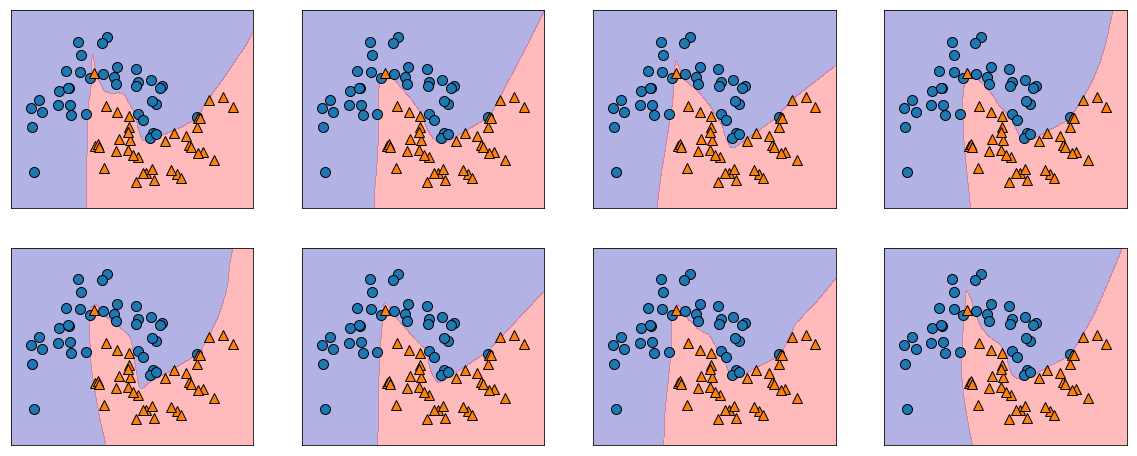

In [22]:
# NNの場合には、まったく同じパラメータを用いても、異なる乱数シードを用いると、まったく異なるモデルが得られる

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i , ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [24]:
# cancer データに対する適用
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
#スケールが大きいので、あまり高い精度は出ない
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.9061032863849765
0.8811188811188811


In [30]:
# データのスケールが大きいので、入力特徴量をが同じ範囲に収まっているのが好ましい
# 理想的には平均が0、分散が1になる
#StandardScaler を用いれば自動でスケール変換をしてくれる

# 訓練セットの特徴量ごとの平均値を算出
mean_on_train = X_train.mean(axis=0)

# 訓練セットの特徴量ごとの標準偏差を算出
std_on_train = X_train.std(axis=0)

# 平均を引き、標準偏差の逆数でスケール変換する
# これでmean=0, std=1になる
X_train_scaled = (X_train - mean_on_train) / std_on_train
# まったく同じ変換（訓練データの平均と標準偏差を使って）をテストセットにほどこす
X_test_scaled = (X_test - mean_on_train) / std_on_train

# warningが出る
# 確率的最適化器：繰り返し回数が上限に達したが、最適化が収束していない
# これはモデルの学習に使っているadamアルゴリズムの機能で、学習の繰り返し回数を増やすべきだと言っている
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.9906103286384976
0.965034965034965


/Users/takaaki-suzuki/.pyenv/versions/3.6.5/envs/sklearn-test/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
